<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_3_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivatives

we want to find minimum of MSE. so derivatives of MSE should be zero  
y = m*x + b  
MSE(m,b)

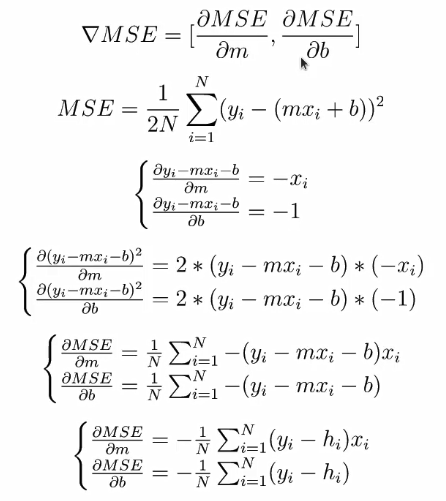

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generating Dataset

In [4]:
x = np.random.rand(100, 1) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

dataset = np.hstack((x, y))
dataset[:3]

array([[11.75639923, 24.47918873],
       [11.24920714, 27.97468264],
       [ 3.93223111,  8.04991378]])

In [5]:
X = dataset[:, 0]
y = dataset[:, 1]

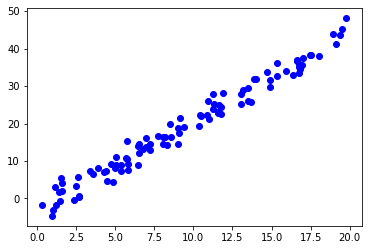

In [6]:
plt.plot(X, y, 'bo')

# Building Linear Regression Object

In [16]:
class Linear_Regression:
    # the initial point in regression oke to be 0 but in NN you can't set 0 as initial state
    def __init__(self):
        self.m = 0
        self.b = 0
        
    def predict(self, x):
        # mx + b
        return self.m * x + self.b
    
    def get_MSE_error(self, x, y):
        h = self.predict(x)
        return np.mean((y - h) ** 2) / 2
    
    def get_MSE_derivatives(self, x, y):
        h = self.predict(x)
        return [-np.mean((y - h) * x), -np.mean(y - h)]
    
    def fit(self, x, y, alpha, itterations):
        for i in range(itterations):
            der_m, der_b = self.get_MSE_derivatives(x, y)
            self.m = self.m - alpha * der_m
            self.b = self.b - alpha * der_b

In [14]:
model = Linear_Regression()
model.fit(X, y, 0.01, 100)

print('y = {} * x + {}'.format(model.m, model.b))

print(model.get_MSE_error(X,y))

y = 2.161137994871784 * x + -0.52601814918697
2.9313092941865797


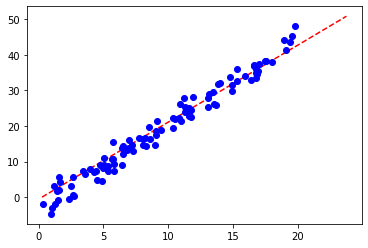

In [15]:
x_line = np.array([dataset[:, 0].min() * 0.8, dataset[:, 0].max() * 1.2])
y_line = model.m * x_line + model.b

plt.plot(x_line, y_line, 'r--')
plt.plot(X, y, 'bo')